# Assignment No 3a
### *Written By: Sibt ul Hussain*
----
## Goal

Your goal in this part of assigment is to test your KNN Classifier on a kaggle competition. 

- The first competition is [Otto Group Product Classification Challenge](http://www.kaggle.com/c/otto-group-product-classification-challenge), here the goal is to place the given object in its right category (prize for winning this competition is US $10,000).

For the fun part your can also test your code for the [digit classification](http://www.kaggle.com/c/digit-recognizer).


**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.

#### HelpFul Functions
You might find following functions to be extremely helpful
 - **[argpartition] (http://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html)** uses introselect algorithm to perform an indirect partition along the given axis. This can lead to O(n) complexity instead of O(nlogn). Remember indexing start from 0.
 - **[itemfreq]()** a function that returns a 2-D array of item frequencies.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# TODO: You have to implement the following class
## Your code goes here...

class KNearestNeighbor:
    ''' Implements the KNearest Neigbours For Classification... '''
    def __init__(self, k, scalefeatures=False):        
        self.k=k
        self.scalefeatures=scalefeatures
        
        pass    
    
    def compute_distances_two_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a nested loop over both the training data and the 
        test data.

        Input:
        X - An num_test x dimension array where each row is a test point.

        Output:
        dists - A num_test x num_train array where dists[i, j] is the distance
                between the ith test point and the jth training point.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in xrange(num_test):
            for j in xrange(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]               #
                #####################################################################
                dists[i, j] = np.sum(np.square(X[i, :] - self.X_train[j, :]))
                #####################################################################
                #                       END OF YOUR CODE                            #
                #####################################################################
        return dists

    def compute_distances_one_loop(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a single loop over the test data.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in xrange(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            #######################################################################
            dists[i, :] = np.square(self.X_train - X[i, :]).sum(axis=1)
            #######################################################################
            #                         END OF YOUR CODE                            #
            #######################################################################
        return dists

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.   
        # Look at the np.repeat function as well                                #
        #########################################################################
        dots = (self.X_train.dot(X.T)*2)
        XtrainNorms = np.sum(np.square(self.X_train), axis=1)
        XtestNorms = np.sum(np.square(X), axis=1)
        dists = (-dots+XtestNorms).T+XtrainNorms
        #########################################################################
        #                         END OF YOUR CODE                              #
        #########################################################################
        return dists
    def scale_features(self,X):
        """
            Normalize each feature to lie in the range [0 ,1]

            Input:
            ------

                X= M x d dimensional data matrix

            Returns:
            --------

                normalized X
        """
        # we will store these values compute on training set to use during testing 
        self.xmin= np.min(X,axis=0)
        self.xmax= np.max(X,axis=0)

        return (X-self.xmin)/(self.xmax-self.xmin)
    def train(self, X, Y):
        ''' Train K Nearest Neighbour classifier using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        
        
        nexamples,nfeatures=X.shape
        
        if self.scalefeatures:
            X=self.scale_features(X)
        
        
        #Your code goes here...
        self.X_train = X
        self.Y_train = Y
        #define self.X_train to store the training data...
        
    
    def predict(self, X, methodtype='noloops'):
        
        """
        Test the trained K-Nearset Neighoubr classifier result on the given examples X
        
                   
            Input:
            ------
            X: [m x d] a matrix of m  d-dimensional test examples.
            methodtype: which method to use for calculating distances.
               noloops: without using any loop
               oneloop: using one loop
               twoloops: using two nested loops...
               
            Returns:
            -----------
                pclass: the predicted class for the given set of examples, i.e. to which it belongs
        """
        
        num_test = X.shape[0]
        
        if self.scalefeatures:
            X=(X-self.xmin)/(self.xmax-self.xmin)
        
        y_pred = np.zeros(num_test, dtype = self.Y_train.dtype)
        
        # defining a function variable so that you will only need to call compute_distance
        # for computing the distances...
        if methodtype == 'noloops':
            compute_distance = self.compute_distances_no_loops
        elif methodtype == 'oneloop':
            compute_distance = self.compute_distances_one_loop
        else:
            compute_distance = self.compute_distances_two_loops
        #your code goes here...
        dists=compute_distance(X)
        distsK = dists.argsort(axis=1)[:, :self.k]
        votes = np.reshape(self.Y_train[distsK.flatten()], newshape=distsK.shape)
        
        for i, vote in enumerate(votes):
            temp = np.unique(vote, return_counts=True)
            y_pred[i] = temp[0][temp[1].argmax()]
        return y_pred

In [3]:
#convert predicted classes to a matrix...
def class_2_matrix(Y, nclasses):
    '''
    converts a vector of length m to a matrix of m x nclasses (required for computing log-loss and kaggle format),
    Inputs:
    ----------
    
        Y: a vector of length m 
        nclasses: number of classes in the dataset
    
    Retuns:
    ----------
        a binary matrix of size m X nclasses, with all columns of i_th example
        set to zero except the one to which the class belongs (or predicted to belong).
    
    '''
    
    ntest=len(Y)
    pclassm=np.zeros((ntest,nclasses),np.uint8)

    for i in range(len(Y)):
        j=int(Y[i].split('_')[1])-1
        pclassm[i,j]=1
    
    return pclassm

In [4]:
def logloss(plabels,olabels):
    '''
        computes the logloss from the predicted labels and original labels vectors...
        

            logloss=−1N∑i=1N∑j=1Myi,jlog(pi,j)
            
        Input:
        ---------
        
            plabels: predicted labels
            olabels: original lables
        
        Returns:
        --------
            logloss: logistic loss for the given set of examples...
        
    '''
    
    nclasses=len(np.unique(olabels))
    
    olabels=class_2_matrix(olabels,nclasses)
    plabels=class_2_matrix(plabels,nclasses) 
    
    epsilon = 1e-15
    import scipy as sp
    plabels = sp.maximum(epsilon, plabels) # clip the plabels
    plabels = sp.minimum(1-epsilon, plabels)
    logloss=-1.0/len(Ytest)*np.sum(np.log(plabels)*olabels)
    
    return logloss

In [5]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

## Otto Group Product Classification Challenge

In [6]:
#Download the dataset and use it
#load the data set
data=pd.read_csv('./train.csv')
print data.describe()
print data.columns

                 id       feat_1        feat_2        feat_3        feat_4  \
count  61878.000000  61878.00000  61878.000000  61878.000000  61878.000000   
mean   30939.500000      0.38668      0.263066      0.901467      0.779081   
std    17862.784315      1.52533      1.252073      2.934818      2.788005   
min        1.000000      0.00000      0.000000      0.000000      0.000000   
25%    15470.250000      0.00000      0.000000      0.000000      0.000000   
50%    30939.500000      0.00000      0.000000      0.000000      0.000000   
75%    46408.750000      0.00000      0.000000      0.000000      0.000000   
max    61878.000000     61.00000     51.000000     64.000000     70.000000   

             feat_5        feat_6        feat_7        feat_8        feat_9  \
count  61878.000000  61878.000000  61878.000000  61878.000000  61878.000000   
mean       0.071043      0.025696      0.193704      0.662433      1.011296   
std        0.438902      0.215333      1.030102      2.25577

In [7]:
Y=data['target']

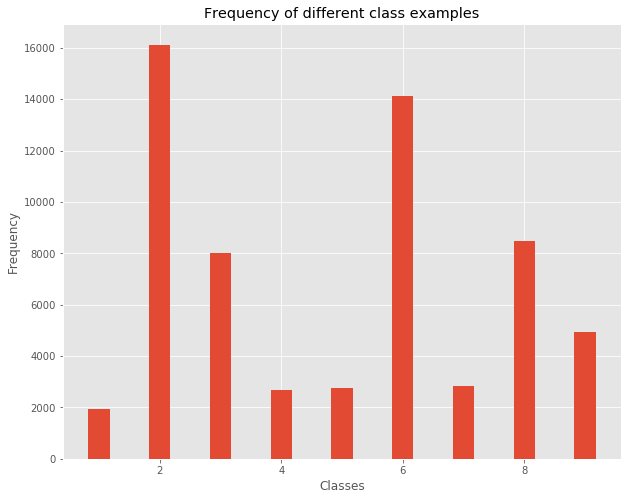

In [8]:
#Seeing is beleaving, so lets start...
#Lets first plot the frequency of each class...
freq=scipy.stats.itemfreq(Y)# Get frequency of each class....
plt.bar(np.arange(1,len(freq[:,1])+1),freq[:,1],width=0.35)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Frequency of different class examples')

## Problem with Accuracy as evaluation Metric
Accuracy as evaluation metric works well when we have same number of examples for different classes, but for the datasets with imbalanced number of examples for each class accuracy is not preferred. For example consider you have dataset with 100 examples (95 from class-1 and 5 from class-2). Now having accuracy of 95% can mean correct classification of all the examples of class-1 with all examples of class-2 being miss-classified, which is not acceptable. So remember to never use the accuracy as evaluation metric for dataset with different number of examples for each class.

In [9]:
# Get your data in matrix
X=np.asarray(data.ix[:,1:-1].dropna(),dtype=np.float32)
print X.shape
Y=np.asarray(data.ix[:,-1])
print Y, Y.shape, len(np.unique(Y)) # so we have 9 classes...

(61878L, 93L)
['Class_1' 'Class_1' 'Class_1' ..., 'Class_9' 'Class_9' 'Class_9'] (61878L,) 9


In [10]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape   


 Training Data Set Dimensions= (43315L, 93L) Training True Class labels dimensions (43315L,)
 Test Data Set Dimensions= (18563L, 93L) Test True Class labels dimensions (18563L,)


In [32]:
# Lets train a Decision Tree Classifier on Petal Length and Width
knn=KNearestNeighbor(3) # train a 3-nearest neighbour classifier...
knn.train(Xtrain,Ytrain)

In [18]:
def write_in_kaggle_format(filename,ids,pclasses,nclasses=9):
    '''
        write the result in kaggle required format...
        
        Input:
        ----------
            filename: name of file
            ids: an array of ids of the examples
            pclasses: predicted classes of each example...
            
        
        Returns:
        ----------
            Nothing.
        
    '''
    
    #write the result in the kaggle's required format
    
    pclasses=class_2_matrix(pclasses,nclasses)
    
    dic=defaultdict(list) #build dictionary...
    dic['id']=ids
    for i in range(pclasses.shape[1]):
        dic['Class_'+str(i+1)]=pclasses[:,i]

    output = pd.DataFrame(dic,columns=['id','Class_1','Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9'])

    # Use pandas to write the comma-separated output file
    output.to_csv( filename, index=False, quoting=3 )

Lets see how good we are doing...
==================

In [19]:
#Lets see how good we are doing, by finding the accuracy on the test set..
#%debug

def test_by_5000(Xtest,knn, subsetsize=5000):
#lets split the test set into subsets of 5000 examples, to use our implementation without loops
    nsubsets=Xtest.shape[0]/subsetsize
    remaining=Xtest.shape[0]%subsetsize
    XtestSplit=np.split(Xtest[:nsubsets*subsetsize,:],nsubsets)
    XtestSplit.append(Xtest[-remaining:,:])

    pclasses=[]
    i=1
    print "Processing for subset =", 
    for test in XtestSplit:
        print str(i)+',',
        t=knn.predict(test)
        pclasses.extend(list(t))
        i += 1
    
    return pclasses

In [44]:
#%debug

pclasses = test_by_5000(Xtest, knn, subsetsize=1000)
print logloss(np.array(pclasses),Ytest) # smaller this value is better your results are it is logloss...
print len(pclasses),Xtest.shape

Processed for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 7.95789186236
18563 (18563L, 93L)


# Feature Scaling (or Normalization)

Since we are using Euclidean distance to find the nearest neighbours, which is (as we have seen in the lectures) is heavily influenced by differently scaled features (that features having different scales and ranges). So to make best of K Nearest Neigbhour classifier we will be needed to first scale each feature dimension. Now lets go and write code for the feature scaling in KNearestNeighbour...

In [45]:
# Lets train a KNN Classifier on Normalized Petal Length and Width
feat=[0,1]
knn=KNearestNeighbor(3,scalefeatures=True) # train a 3-nearest neighbour classifier...

knn.train(Xtrain[:,feat],Ytrain)
#Lets test it on the set of unseen examples...
pclasses=test_by_5000(Xtest[:,feat],knn)#knn.predict(Xtest[:,feat])

print logloss(pclasses,Ytest)

Processed for subset = 1, 2, 3, 4, 25.9054777647


#Comment on the effect of feature scaling and normalization. 

What is the difference between the results of normalized features and non-normalized features. Why we are seeing the improvement (or decrease) in the accuracy.

#Lets Train on all features (can really bake your machine)....

In [46]:
# Lets train a KNN on all the features... will take around 1 hour
feat=np.arange(Xtrain.shape[1])
knn=KNearestNeighbor(100)# With K as a random guess...
knn.train(Xtrain[:,feat],Ytrain)
pclasses=test_by_5000(Xtest[:,feat],knn, subsetsize=1000)
#Lets see how good we are doing, by finding the logloss on the test set..
print "LogLoss = ", logloss(pclasses,Ytest)

Processed for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, LogLoss =  8.80447610304


# Training on original training and kaggle test Set

In [11]:

datatest=pd.read_csv('./test.csv')
ids=np.array(datatest['id'])
Xtest=np.array(datatest.ix[:,1:].values,dtype=np.float32)

In [52]:
#Lets train on 10 randomly selected features 
feat=np.arange(X.shape[1])
np.random.shuffle(feat)#using only ten features X.shape[1])
feat=feat[:10]
print feat
knn=KNearestNeighbor(100)# With K as a random guess...
knn.train(X[:,feat],Y)
pclasses=test_by_5000(Xtest[:,feat], knn, subsetsize=1000)
#Lets see how good we are doing, by finding the logloss on the test set..

 [91  8 49 34 53 65 59 60 90 76]
Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, LogLoss = 

ValueError: operands could not be broadcast together with shapes (144368,9) (18563,9) 

In [60]:
#Write in Kaggle Format...
write_in_kaggle_format('kaggel-otto-5features-100-nn',ids,pclasses)

In [61]:
len(pclasses)

144368

#### Your rank should be around 2500, still better than many with using a simple classifier and random settings.

In [62]:
# Lets train a KNN on all the features...

#Becareful it can take around 3 Hours on an i5 machine to complete this, you can use time.time() function to time your code.


feat=np.arange(X.shape[1])
knn=KNearestNeighbor(100)# With K as a random guess...
knn.train(X[:,feat],Y)
pclasses=test_by_5000(Xtest[:,feat],knn, subsetsize=1000)


Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,


In [63]:
write_in_kaggle_format('kaggel-otto-Allfeatures-100-nn',ids,pclasses)

What can you conclude ?
====================
Please write your observation....



#Cross-Validation [For Improving your Rank]

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Now go and tune your hyper-parameters (K in this case) to opitmize the performance for only first two parameters.


However here we will have to use a trick for better performance. We will train only a single classifier per fold with the maximum K value in the grid. Then we will simply decrease the value of K each time and see its impact. 

** Still you will require around 12 Hours to find the best paramaters, so be careful. **

In [67]:
# Now lets cross validate for best paramters, and test the result...
# We will be training four different models on four different partitions of data set and 
# then will be reporting the mean logloss of the four classifiers.

nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[0,1] # features to use for our system
#now lets train and test on these folds...

#Lets perform the grid search...
ks=np.arange(1,200,10) # search the k in the range one to 20...
foldacc=[]          
# Your code goes here...
 
for k in ks: 
    print 'Testing k =', str(k)
    hist = np.zeros((nfolds,))
    for i, f in enumerate(folds):
        print 'Operating on fold =',str(i+1) 
        xtrain, ytrain, xtest, ytest = f
        candknn = KNearestNeighbor(k, scalefeatures=False)
        candknn.train(xtrain, ytrain)
        pclasses = test_by_5000(xtest, candknn, subsetsize=1000)
        acc = np.sum(pclasses == ytest) / (1. * ytest.shape[0])
        hist[i] = acc 
    foldacc.append(hist.mean())
bestk=np.argmin(foldacc)    
print '\n\n Best value for the K={} and gives following mean logloss={}'.format(ks[bestk],foldacc[bestk])
bestk=ks[bestk]

 Generating CV data for 9 classes
Testing k = 1
Operating on fold = 1
Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, Operating on fold = 2
Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, Operating on fold = 3
Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, Operating on fold = 4
Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, Testing k = 11
Operating on fold = 1
Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, Operating on fold = 2
Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, Operating on fold = 3
Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, Operating on fold = 4
Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, Testing k = 21
Operating on fold = 1
Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, Operating on 

# Retrain the classifier with best-k and see its accuracy on kaggle

In [14]:
optknn = KNearestNeighbor(191, scalefeatures=False)
optknn.train(Xtrain, Ytrain)

In [20]:
pclasses = test_by_5000(Xtest, optknn, subsetsize=1000)

Processing for subset = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,


In [21]:
write_in_kaggle_format('kaggel-otto-Allfeatures-final-nn',ids,pclasses)

### Add the screenshow below